<a href="https://colab.research.google.com/github/senchiao/HRRR_plots/blob/main/derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

Specifically, just as I compared a numerical approximation and and exact
integral on day 2, here

Calculate the numerical derivitive of $y=5 x^3 - 3 x^2 + 4 x - 7$ and
compare it to the exact answer $yprime = 15 x^2 - 6 x + 4$ for the range
$0 \le x < 10$

start by defining the function and its derivative

In [3]:
def my_func(x):
    return 5*x**3. - 3*x**2. + 4*x - 7

Now take the derivitive of my_func using the usual rule

In [4]:
def analytic_deriv(x):
    return 15*x**2. - 6*x + 4

now evaluate it for 200 values of x between 0 and 10

In [5]:
xvec=np.linspace(0,10,200)

In [6]:
y=my_func(xvec)

Here is an example of how to get handles to a figure and an axis, so that you can add elements to a plot.

I'm using the "subplots" command to get the figure and axis objects so I can
reuse them in later cells

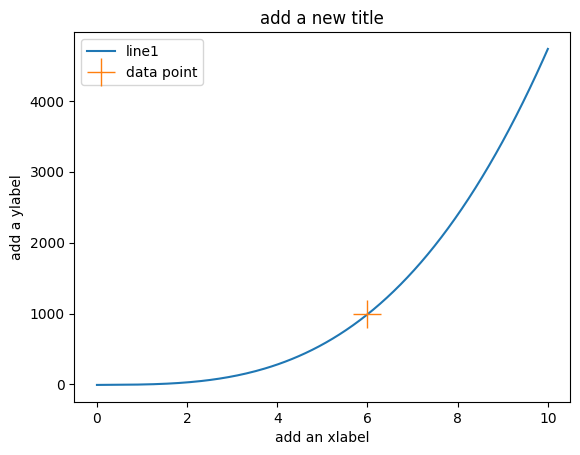

In [7]:
fig1,axis1=plt.subplots(1,1) #we're asking for a single graph (1 column, 1 row) on the figure
axis1.plot(xvec,y,label='line1')  #put a plot on axis 1
axis1.set_title('add a new title')
axis1.set_xlabel('add an xlabel')
axis1.set_ylabel('add a ylabel')

#place a cross at a particular location, and give it a
#label so it can be added to the legend
axis1.plot(6,1000,'+',markersize=20,label='data point')
axis1.legend() #add a legend with the line1 label given in the plot call above


Now plot the numerical and analytic derivatives on top of each other
to show that they agree.   To calculate the numerical derivitive, just
use the diff function to find the approximate value $deriv=\frac{\Delta y}{\Delta x}$

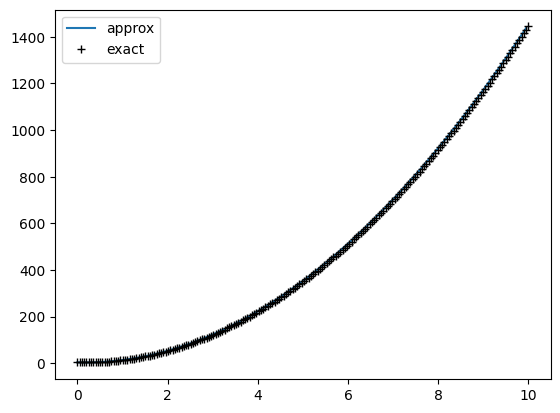

In [8]:
deltay=np.diff(y)
deltax=np.diff(xvec)
approx_deriv=deltay/deltax
fig2,axis2=plt.subplots(1,1)
axis2.plot(xvec[:-1],approx_deriv,label='approx') #remember that diff() chops one off the length
                                                  #of xvec
#now add the analytic derivative to the plot
exact_deriv=analytic_deriv(xvec)
axis2.plot(xvec,exact_deriv,'k+',label='exact') #'k+' means black crosses, as in matlab
axis2.legend()

plot the difference $exact - approx$ so that we can better distinguish the size of the error

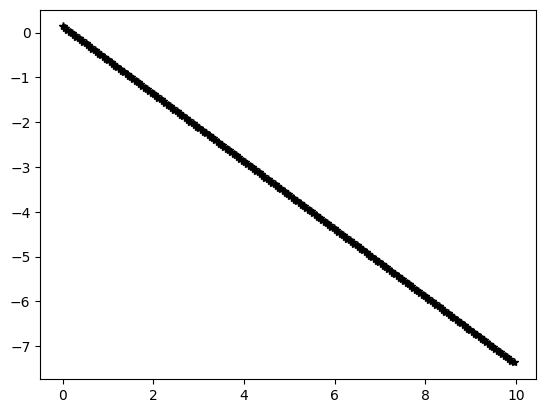

In [9]:
fig3,axis3=plt.subplots(1,1)
axis3.plot(xvec[:-1],exact_deriv[:-1] - approx_deriv,'k*')

Read Stull page 37 on Wien's law, which says that the peak of the Planck function
occurs at a wavelength given by $\lambda_{max} = \frac{a}{T}$

Show that this wavelength is in fact the maximum finding the index where the derivitive is zero
and printing the wavelength at that wavelengt, followed by the Wien's law result $\frac{a}{T}$

Instead of printing, you can alternatively use the plotting code above to plot
$\frac{dE^*_\lambda}{d \lambda}$ and then plotting it vs. wavelength,
showing that it passes through zero at $\lambda_{max}$ (add
$\lambda_{max}$ on the graph as a large cross).  Here's the version of the planck function I used
for this:

In [10]:
c=2.99792458e+08  #m/s -- speed of light in vacumn
h=6.62606876e-34  #J s  -- Planck's constant
kb=1.3806503e-23  # J/K  -- Boltzman's constant



def planckwavelen(wavel,Temp):
    """input wavelength in microns and Temp in K, output
    bbr in W/m^2/micron
    """

    wavel=wavel*1.e-6  #convert to meters
    c1=2.*h*c**2.
    c2=h*c/kb
    Elambda=1.e-6*np.pi*c1/(wavel**5.*(np.exp(c2/(wavel*Temp)) -1))
    return Elambda

